##  **Description** :
Here the one finance Company which provides the loan to the customers, on the basis of their details which is provided by the customers by filling online application form.
but before approving the loan, company analyzes many credentials of the customers like he is male or female ,whether the customer is educated or not, whether he is married or single, and many more parameters that the comapany looks.
and now company wants to automate this loan approval process for those customers, those are eligible for loan. so that they can specially target those customers.

here this is a classification task, where we have to develop a machine learning model that can predict whether a loan is approved or not.


# **Importing all the Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [2]:
#Loading dataset to pandas DataFrame
df = pd.read_csv("/content/loan_dataset.csv")

In [3]:
#Print first 5 rows of DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Checking missing values**

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

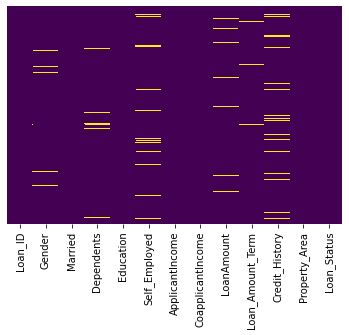

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# **Statistical Measures of all numeric column**

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Checking value counts of categorical columns**

In [8]:
#Property_Area column values or category
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
#Credit_History column values
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [10]:
#Dependent column values
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# **Exploratory Data Analysis with each attributes**

# Visualisation with Caterogical attributes to see the relationship



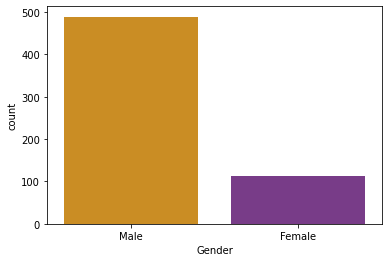

In [11]:
sns.countplot(df["Gender"], palette="CMRmap_r")

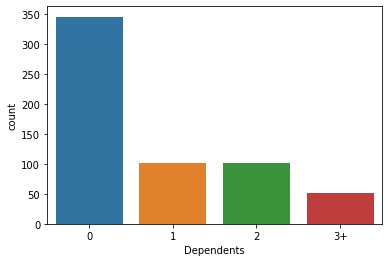

In [12]:
sns.countplot(df["Dependents"])

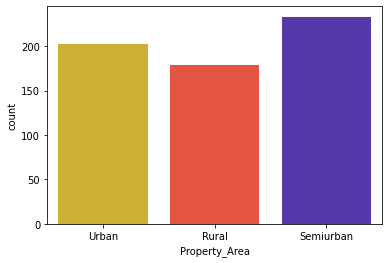

In [13]:
sns.countplot(df["Property_Area"], palette="CMRmap_r")

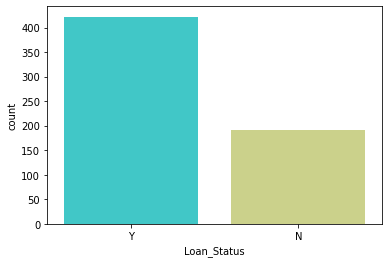

In [14]:
#check loan status
sns.countplot(df["Loan_Status"], palette="rainbow")

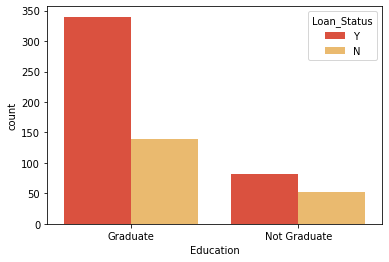

In [15]:
#education and loan status relaion
sns.countplot(data = df, x="Education", hue="Loan_Status", palette="YlOrRd_r")

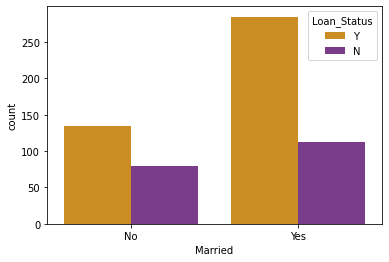

In [16]:
#marital status and loan status relation
sns.countplot(data=df, x="Married", hue="Loan_Status", palette="CMRmap_r")

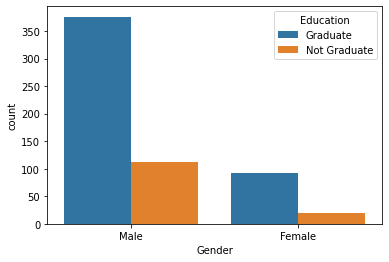

In [17]:
sns.countplot(data=df, x="Gender", hue="Education")

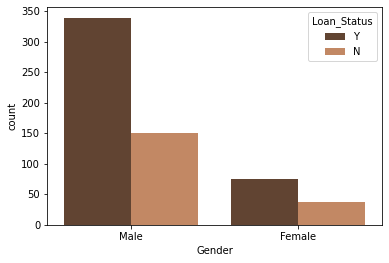

In [18]:
sns.countplot(data=df, x="Gender", hue="Loan_Status", palette="copper")

# **Feature Engineering**

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [21]:
df.drop(["ApplicantIncome", "CoapplicantIncome", "Loan_ID"], axis=1, inplace= True)

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


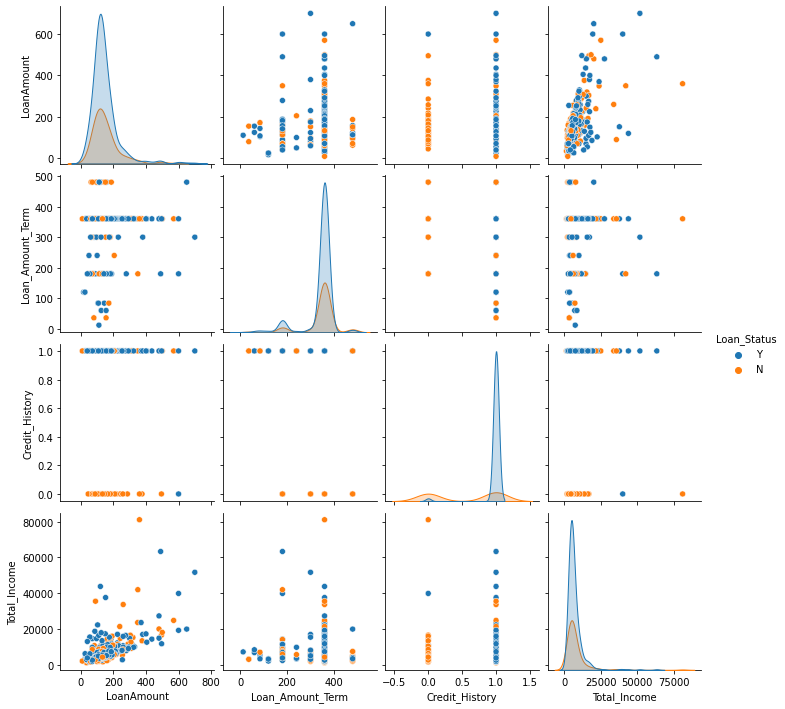

In [23]:
sns.pairplot(df, hue="Loan_Status")

# **Data Cleaning and preprocessing**

## Handle missing Values

In [24]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [59]:
#placing mean value using fillna() 
lmean= df["LoanAmount"].mean()
cmean=df["Credit_History"].mean()

print(f"lmean : {lmean}")
print(f"cmean : {cmean}")

lmean : 145.5181385259798
cmean : 0.8509493339614256


In [26]:
df["LoanAmount"].fillna(lmean, inplace=True)
df["Credit_History"].fillna(cmean, inplace=True)

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


In [28]:
#droping other missing value
df = df.dropna()

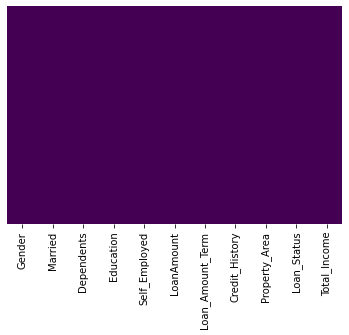

In [29]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# **Seperating the data into x and y (input & output)**

In [30]:
x = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [31]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,2900.0
610,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,4106.0
611,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,8312.0
612,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,7583.0


In [32]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 542, dtype: object

# **Label Encoding**

In [33]:
y.value_counts()

Y    376
N    166
Name: Loan_Status, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
y = le.fit_transform(y)

In [36]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,

In [37]:
x["Dependents"].value_counts()

0     309
2      94
1      94
3+     45
Name: Dependents, dtype: int64

In [38]:
x["Dependents"] = le.fit_transform(x["Dependents"])

In [39]:
x["Dependents"].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [41]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), ["Gender", "Married","Education","Self_Employed","Property_Area"])], remainder="passthrough")
x = ct.fit_transform(x)

In [42]:
x

array([[0.000e+00, 1.000e+00, 1.000e+00, ..., 3.600e+02, 1.000e+00,
        5.849e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.600e+02, 1.000e+00,
        6.091e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.600e+02, 1.000e+00,
        3.000e+03],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.600e+02, 1.000e+00,
        8.312e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.600e+02, 1.000e+00,
        7.583e+03],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 3.600e+02, 0.000e+00,
        4.583e+03]])

# **Split the data into training and testing**

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=2, stratify=y)

In [44]:
print(x.shape, xtrain.shape, ytrain.shape)

(542, 16) (433, 16) (433,)


In [45]:
print(x.shape, xtest.shape, ytest.shape)

(542, 16) (109, 16) (109,)


In [46]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    ac =accuracy_score(ytest, ypred)
    cm = confusion_matrix(ytest, ypred)
    cr = classification_report(ytest, ypred)

    print(f"Accuracy: {ac}\n\ncofusion Matrix : \n{cm}\n\nclassification report :\n{cr}")
    return cm

In [47]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()

In [48]:
mymodel(logreg)

Accuracy: 0.7981651376146789

cofusion Matrix : 
[[14 19]
 [ 3 73]]

classification report :
              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.79      0.96      0.87        76

    accuracy                           0.80       109
   macro avg       0.81      0.69      0.71       109
weighted avg       0.80      0.80      0.78       109



array([[14, 19],
       [ 3, 73]])

In [49]:
mymodel(dt)

Accuracy: 0.7706422018348624

cofusion Matrix : 
[[19 14]
 [11 65]]

classification report :
              precision    recall  f1-score   support

           0       0.63      0.58      0.60        33
           1       0.82      0.86      0.84        76

    accuracy                           0.77       109
   macro avg       0.73      0.72      0.72       109
weighted avg       0.77      0.77      0.77       109



array([[19, 14],
       [11, 65]])

In [50]:
mymodel(svm)

Accuracy: 0.6697247706422018

cofusion Matrix : 
[[ 0 33]
 [ 3 73]]

classification report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.69      0.96      0.80        76

    accuracy                           0.67       109
   macro avg       0.34      0.48      0.40       109
weighted avg       0.48      0.67      0.56       109



array([[ 0, 33],
       [ 3, 73]])

# **Cross Validation Score**

In [51]:
cvs = cross_val_score(logreg, x,y, cv=5, scoring="accuracy")
print(cvs.mean())

0.7713897383622155


# **Hyperparameter Tunning for logistic model**

In [52]:
parameters = {"C":[1,10,100], "max_iter": [100,200,300], "solver": ["liblinear","saga","lbfg"], "penalty": ["l1","l2"]}

In [53]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), parameters, verbose=2 )
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=lbfg; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfg']},
             verbose=2)

In [54]:
grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [55]:
ypred=grid.predict(xtest)

In [56]:
print(f"Accuracy: {accuracy_score(ytest, ypred)}\n\nclassification report :\n{classification_report(ytest, ypred)}")

Accuracy: 0.7889908256880734

classification report :
              precision    recall  f1-score   support

           0       0.81      0.39      0.53        33
           1       0.78      0.96      0.86        76

    accuracy                           0.79       109
   macro avg       0.80      0.68      0.70       109
weighted avg       0.79      0.79      0.76       109



# Accuracy before Tunning

In [57]:
mymodel(logreg)

Accuracy: 0.7981651376146789

cofusion Matrix : 
[[14 19]
 [ 3 73]]

classification report :
              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.79      0.96      0.87        76

    accuracy                           0.80       109
   macro avg       0.81      0.69      0.71       109
weighted avg       0.80      0.80      0.78       109



array([[14, 19],
       [ 3, 73]])

# **Model prediction analysis throgh Confusion Matrix**

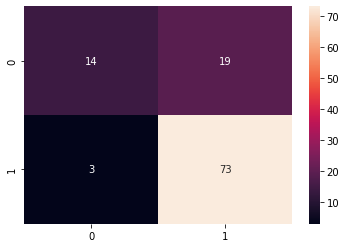

In [58]:
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)
cm = confusion_matrix(ytest, ypred)

sns.heatmap(cm, annot=True)